# Data Wrangling

## Gathering Data

In [161]:
# Loading my necessary libraries

import pandas as pd
import numpy as np
import requests
import io
import tweepy
import json

In [162]:
# Loading the main twitter archive into a DataFrame

df_main = pd.read_csv('twitter_archive.csv')

In [163]:
# Using the requests library to get data from the provided url and load it into a DataFrame.

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url).content
df_img = pd.read_csv(io.StringIO(r.decode('utf-8')), sep="\t")

In [11]:
# The last source of data comes from twitter itself. Here I use my own twitter app keys and tokens, provided by twitter,
# and the tweepy library to set up an API that will allow me to query tweet info.

consumer_key = "Nows8Vpx7CRUJobFOLozLPN2M"
consumer_secret = "QPXccibXfq1bz2ZADEMpJbHbVrOUlwxIrM4tY6BxoRV8rlKpfm"
access_token = "1059977742450487296-JXGfMjphpnr24bEE0wM3LhfbjcJBf4"
access_token_secret = "ZvkpjxNqdtkTRqZegfvvXn7dtstI3wWBuJTPuBmQRZSv2"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Here is the list of tweet id's I will use for my tweet queries.

id_list = df_main['tweet_id'].tolist()
error_list = []

# With a for loop, and a try/except block that will notify me if there's a tweepy specific error and will add that tweet id 
# to a list, this block of code will query each tweet's information in JSON format, then write it to a text file, add a new line, 
# and move on to the next tweet.


with open('json_data.txt', 'w') as outfile:
    for id in id_list:
        try:
            tweet = api.get_status(id, tweet_mode='extended')
        except tweepy.TweepError:
            print(f"tweet {id} experienced an error")
            error_list.append(id)
        json.dump(tweet._json, outfile)
        outfile.write('\n')


tweet 888202515573088257 experienced an error
tweet 873697596434513921 experienced an error
tweet 872668790621863937 experienced an error
tweet 869988702071779329 experienced an error
tweet 866816280283807744 experienced an error
tweet 861769973181624320 experienced an error
tweet 845459076796616705 experienced an error
tweet 842892208864923648 experienced an error
tweet 837012587749474308 experienced an error
tweet 827228250799742977 experienced an error
tweet 802247111496568832 experienced an error
tweet 775096608509886464 experienced an error
tweet 770743923962707968 experienced an error
Rate limit reached. Sleeping for: 737
tweet 754011816964026368 experienced an error
Rate limit reached. Sleeping for: 738


In [164]:
# Now I create my third DataFrame using the json based text file I just created.

with open('json_data.txt') as f:
    df_json = pd.DataFrame(json.loads(line) for line in f)

With this I've gathered all my data from three sources into three DataFrames, df_main, df_img, and df_json.

## Assessing Data

In [165]:
# Looking at df_main's structure and visual appearance

df_main.info()
df_main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [166]:
# Here are the value counts for each of the dog types. Most entries don't have a type and have values of None for each column.

print(df_main['doggo'].value_counts())
print(df_main['floofer'].value_counts())
print(df_main['pupper'].value_counts())
print(df_main['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [167]:
# I noticed the timestamp column included a part for the timezone so I just wanted to check if there are any timezones besides
# +0000

df_main['timestamp'].str[19:].value_counts()


 +0000    2356
Name: timestamp, dtype: int64

In [168]:
# Filtering out the other columns and then downloading the DataFrame as a csv file so I can get a better
# look at the text.

df_denom = df_denom.loc[:,['text','rating_numerator','rating_denominator']]
df_denom.info()
df_denom.to_csv('ratings.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
text                  23 non-null object
rating_numerator      23 non-null int64
rating_denominator    23 non-null int64
dtypes: int64(2), object(1)
memory usage: 632.0+ bytes


In [169]:
# Looking more closely at the 23 entries that have non-null values for in_reply_to_status_id and
# in_reply_to_user_id

df_reply = df_main.query('in_reply_to_status_id == in_reply_to_status_id')
df_reply.to_csv('reply.csv')

In [170]:
# Looking at the name column

df_main['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Buddy          7
Toby           7
Bailey         7
Daisy          7
Oscar          6
Dave           6
Stanley        6
Milo           6
Scout          6
Jax            6
Jack           6
Leo            6
Rusty          6
Koda           6
Bella          6
Gus            5
            ... 
Jareld         1
Jeremy         1
Odin           1
Benny          1
Olaf           1
Dex            1
Monkey         1
Kaiya          1
Sage           1
Scruffers      1
Bobb           1
Harry          1
Bookstore      1
Toffee         1
Antony         1
Cal            1
Bluebert       1
Lipton         1
General        1
Pherb          1
Amélie         1
DayZ           1
Tedders        1
Siba           1
Marvin         1
Dwight         1
Bloo           1
Jaycob        

In [171]:
# Looking at the values for the rating columns

print(df_main['rating_numerator'].value_counts())
print(df_main['rating_denominator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [172]:
# Creating a DataFrame to look more closely at what's going on with the suspicious ratings.

df_denom = df_main.query('rating_denominator != 10')
df_denom.info()
df_denom.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 313 to 2335
Data columns (total 17 columns):
tweet_id                      23 non-null int64
in_reply_to_status_id         5 non-null float64
in_reply_to_user_id           5 non-null float64
timestamp                     23 non-null object
source                        23 non-null object
text                          23 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 19 non-null object
rating_numerator              23 non-null int64
rating_denominator            23 non-null int64
name                          23 non-null object
doggo                         23 non-null object
floofer                       23 non-null object
pupper                        23 non-null object
puppo                         23 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 3.2+ KB


df_main is the DataFrame created from the downloaded twitter archive data. From the initial check, I see there are 2356 tweets. 78 seem to be replies, 181 seem to be retweets, and there is also around 60 missing values under the expanded_urls column. The doggo, floofer, pupper, and puppo columns are also stored as strings but I can either convert these columns to boolean values, or I can merge these 4 columns into a single dog_type column that has a value of doggo, floofer, pupper, puppo, or none.

The timestamp column looks pretty clean but its stored as a string instead of a datetime so I could also change that for easier use as well.

I need to get rid of the retweeted tweets, and then I can also get rid of the columns that deal with retweet status. 

I looked into the reply columns and those tweets looked normal. They had images and normal ratings, so I can keep them but I can get rid of the columns that deal only with reply status.

The name column has quite a few entries with 'None' as a string as well as several that are just normal words without capitalization. The 'None' string tag should be changed also just to make sure it doesn't get confused with the None datatype.

Some of the ratings looked strange, especially the denominator ratings that weren't 10. Looking into them, some of these ratings are okay but a lot of them are inaccurate due to multiple '/' characters being present in the text of the tweet.

The tweet_id column has its entries stored as integers but they should probably be stored as strings because they are used as an identifier and should not be numerically manipulated.

So far my assessment of cleaning needed is as follows:
1. Clean - Get rid of retweet entries.
2. Tidy - Get rid of retweet columns.
3. Tidy - Get rid of the reply columns.
4. Tidy - Streamline the dog type columns (doggo, fluffer, pupper, puppo).
5. Clean - Change the timestamp column values to datetimes.
6. Clean - Change 'None' string values in the name column to NaN.
7. Clean - Change entries in the name column that are just lowercase words.
8. Clean - Fix inaccurate numerator and denominator ratings.
9. Clean - Change tweet_id column from int datatype to a string

In [173]:
# Basic check on the structure and visual appearance of df_img

df_img.info()
df_img.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [174]:
# Checking the value counts of p1, p2, and p3.

print(df_img['p1'].value_counts())
print(df_img['p2'].value_counts())
print(df_img['p3'].value_counts())


golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

df_img is a DataFrame created by pulling the data directly from the Udacity supplied website. It contains dog predictions for a neural network based on pictures of the dog from the tweet. Based on the initial check, so far it looks relatively clean. There are 2075 entries and no missing values in any of the other columns.

The columns also all seem to use good datatypes. Columns with numbers are all actually numeric datatypes, p1_dog, p2_dog, and p3_dog use boolean values instead of something less useful like a string. The exception is that tweet_id is again stored as an integer instead of as a string.

There is also an issue with some of the entries in p1, p2, and p3. Some of the dog names are capitalized and some are lowercase, and an underscore is used instead of a space.

For df_img, my cleaning steps are:

1. Clean - Change tweet_id from an integer column to a string column.
2. Clean - Standardize the way the strings are stored in p1, p2, and p3.

In [175]:
# Assessing df_json visually and programmatically.

df_json.info()
df_json.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2356 non-null object
display_text_range               2356 non-null object
entities                         2356 non-null object
extended_entities                2081 non-null object
favorite_count                   2356 non-null int64
favorited                        2356 non-null bool
full_text                        2356 non-null object
geo                              0 non-null object
id                               2356 non-null int64
id_str                           2356 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38228,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8374,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32776,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6184,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24682,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4092,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41555,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8515,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39742,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9220,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


For df_json, there are a lot of columns, many of which I don't need. The only columns I really want are favorite_count and retweet_count. I'll also need the id column to be able to match the counts with my other DataFrames. That id column is again stored as an integer instead of as a string.

With all three DataFrames assessed, I can also determine that merging them all into one DataFrame is the preferable way to go. I only want to analyze tweets that actually have an image that was run through the neural network so by merging all three DataFrames I will eliminate any tweets that were not run through the neural network.

My cleaning steps are:

1. Tidy - Only take the three columns I want, id, favorite_count, and retweet_count.
2. Tidy - Rename id to tweet_id so it matches the other DataFrames.
3. Clean - Change the tweet_id column from integer datatype to string.
4. Tidy - Merge all DataFrames together into one master DataFrame.

## Cleaning Data

In [176]:
# Creating a copy of df_main before I start cleaning.

df_maincopy = df_main.copy()

In [177]:
# Creating a copy of the original df_img before I start cleaning.
# Saving the original file downloaded programmatically as image_predictions.tsv
df_imgcopy = df_img.copy()
df_img.to_csv("image_predictions.tsv", sep="\t")

In [178]:
# Creating a copy of df_json before I start cleaning.

df_jsoncopy = df_json.copy()

In [179]:
# Querying for only NaN values in the retweeted_status_id column to get rid of all retweets.

df_main = df_main.query('retweeted_status_id != retweeted_status_id')

# Testing the result to make sure all the retweet columns now have 0 entries.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [180]:
# Resetting the index.
df_main.reset_index(drop=True, inplace=True)

df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [181]:
# Dropping the now empty retweet columns.
df_main = df_main.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

# Testing to make sure those columns are now gone.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


In [182]:
# Replacing all the 'None' string entries with NaN.

df_main['doggo'].replace('None', np.nan, inplace=True)
df_main['floofer'].replace('None', np.nan, inplace=True)
df_main['pupper'].replace('None', np.nan, inplace=True)
df_main['puppo'].replace('None', np.nan, inplace=True)

# Testing to see that there are now missing values in the 4 dog type columns.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


In [183]:
# Now I join the last 4 columns together into one, and make sure to dropna because I have a lot of NaN values now.
df_main['doggo_type'] = df_test[df_test.columns[13:17]].apply(lambda x: ','.join(x.dropna()),axis=1)

# Checking the new column I just made and its unique value counts
df_main.info()
df_main['doggo_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
doggo_type               2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 255.0+ KB


                      1774
pupper                 245
doggo                   83
puppo                   47
doggo,pupper            11
floofer                  9
puppo,puppo              3
doggo,puppo              1
doggo,floofer            1
puppo,doggo,pupper       1
Name: doggo_type, dtype: int64

I almost have what I want, except where I had only NaN values before, I now just have empty entries, but these don't show up as missing values in the doggo_type column so I need to convert the b 

In [184]:
# Replacing the empty string values in my doggo_type column with NaNs.

df_main['doggo_type'].replace('', np.nan, inplace=True)

# Checking the results to see that doggo_type no longer has empty strings and actually has the missing values I want.
df_main.info()
df_main['doggo_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
doggo_type               401 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 255.0+ KB


pupper                245
doggo                  83
puppo                  47
doggo,pupper           11
floofer                 9
puppo,puppo             3
doggo,puppo             1
doggo,floofer           1
puppo,doggo,pupper      1
Name: doggo_type, dtype: int64

In [185]:
# After merging the doggo, floofer, pupper, and puppo columns info into one column, I can now drop them from the table.

df_main = df_main.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

# Testing to make sure the doggo, floofer, pupper, and puppo columns are now gone.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo_type               401 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 187.0+ KB


In [186]:
# There was no other timezone besides +0000 so I don't need to worry about it and I can just use pandas to_datetime method
# Even if there was another timezone, because the data was formatted pretty well already, to_datetime may have been able to
# handle different timezones anyway. I don't know its complete default behavior. Either way, the timestamp column is now in
# an easier to use data type in case I want to use it later in my analysis.

df_main['timestamp'] = pd.to_datetime(df_main['timestamp'])

# Testing the resulting datatype of the timestamp column
type(df_main['timestamp'][1])

pandas._libs.tslib.Timestamp

In [187]:
# Standardizing p1, p2, and p3 so characters are lowercase and replacing underscores with spaces.

df_img['p1'] = df_img['p1'].apply(lambda x: x.lower().replace('_',' '))
df_img['p2'] = df_img['p2'].apply(lambda x: x.lower().replace('_',' '))
df_img['p3'] = df_img['p3'].apply(lambda x: x.lower().replace('_',' '))

# Making sure the pick names are now all lowercase and with spaces instead of underscores.
df_img['p1'].value_counts()

golden retriever             150
labrador retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy poodle                    39
pomeranian                    38
cocker spaniel                30
malamute                      30
french bulldog                26
chesapeake bay retriever      23
miniature pinscher            23
seat belt                     22
staffordshire bullterrier     20
siberian husky                20
german shepherd               20
web site                      19
cardigan                      19
beagle                        18
shetland sheepdog             18
eskimo dog                    18
maltese dog                   18
teddy                         18
lakeland terrier              17
shih-tzu                      17
rottweiler                    17
kuvasz                        16
italian greyhound             16
          

In [188]:
# Merging df_main with df_img eliminates the tweets that were either not in the original twitter archive provided or those that
# do not have an image that was run through the neural network. There are still 1994 valid entries.

df_c = pd.merge(df_main, df_img, how='inner', on=['tweet_id'])

# Looking at the resulting combined DataFrame.
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo_type               369 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                  

In [189]:
# I only want to add favorite_count and retweet_count to my final DataFrame, so using the filter() method I filter out
# everything except those 2 columns, and the id column for when I merge. 
# Changing the id's column name to match my other DataFrame will make it easier to merge.

df_json = df_json.filter(['id','favorite_count', 'retweet_count'], axis=1)
df_json.rename(index=str, columns={'id':'tweet_id'}, inplace=True)

# Looking at the new df_json to make sure its only got the three columns I want
df_json.info()
df_json.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
favorite_count    2356 non-null int64
retweet_count     2356 non-null int64
dtypes: int64(3)
memory usage: 73.6+ KB


,tweet_id,favorite_count,retweet_count
0,892420643555336193,38228,8374
1,892177421306343426,32776,6184
2,891815181378084864,24682,4092
3,891689557279858688,41555,8515
4,891327558926688256,39742,9220


In [190]:
# Now I can merge the json DataFrame with my previous one so I'll have everything in one place.

df_master = pd.merge(df_c, df_json, how='inner', on=['tweet_id'])

# Checking the structure of my new DataFrame.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 24 columns):
tweet_id                 2006 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2006 non-null datetime64[ns]
source                   2006 non-null object
text                     2006 non-null object
expanded_urls            2006 non-null object
rating_numerator         2006 non-null int64
rating_denominator       2006 non-null int64
name                     2006 non-null object
doggo_type               370 non-null object
jpg_url                  2006 non-null object
img_num                  2006 non-null int64
p1                       2006 non-null object
p1_conf                  2006 non-null float64
p1_dog                   2006 non-null bool
p2                       2006 non-null object
p2_conf                  2006 non-null float64
p2_dog                   2006 non-null bool
p3                  

Now I have all three of my original DataFrames combined into one, df_master.

In [191]:
# Changing the tweet_id column from integer to string

df_master['tweet_id'].astype(str)

# Checking the column datatype I see it is no longer an integer.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 24 columns):
tweet_id                 2006 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2006 non-null datetime64[ns]
source                   2006 non-null object
text                     2006 non-null object
expanded_urls            2006 non-null object
rating_numerator         2006 non-null int64
rating_denominator       2006 non-null int64
name                     2006 non-null object
doggo_type               370 non-null object
jpg_url                  2006 non-null object
img_num                  2006 non-null int64
p1                       2006 non-null object
p1_conf                  2006 non-null float64
p1_dog                   2006 non-null bool
p2                       2006 non-null object
p2_conf                  2006 non-null float64
p2_dog                   2006 non-null bool
p3                  

In [192]:
# Creating a new column to look at the number of / characters in all of the text entries.

df_master['count'] = df_master['text'].apply(lambda x: x.count('/'))

# Looking at the unique values of this new column
df_master['count'].value_counts()

4    1949
7      28
5      27
6       2
Name: count, dtype: int64

The vast majority of entries have 4 / characters. 3 are from the image url, and every tweet should have an image url, so those entries with 4 / characters should be reliable. There are 57 entries with more than 4 / characters which either need to be dropped or examined closely.

For simplicities sake I'm just going to drop those 57 entries. There is probably a way to use regex patterns to programmatically fix these, or I could just go through them one by one but both would take significant amounts of time and only save 57 out of 1994 entries.

In [193]:
# Dropping those entries and then the count column.

df_master = df_master.query('count == 4')
df_master.drop(['count'], axis=1, inplace=True)

# Checking to make sure I've lost those 57 entries as well as the count column I created.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 2005
Data columns (total 24 columns):
tweet_id                 1949 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                1949 non-null datetime64[ns]
source                   1949 non-null object
text                     1949 non-null object
expanded_urls            1949 non-null object
rating_numerator         1949 non-null int64
rating_denominator       1949 non-null int64
name                     1949 non-null object
doggo_type               359 non-null object
jpg_url                  1949 non-null object
img_num                  1949 non-null int64
p1                       1949 non-null object
p1_conf                  1949 non-null float64
p1_dog                   1949 non-null bool
p2                       1949 non-null object
p2_conf                  1949 non-null float64
p2_dog                   1949 non-null bool
p3                  

The 23 reply entries all look normal with accurate ratings so I can keep them in my DataFrame, but I don't need the two columns.

In [194]:
# Dropping the two reply columns

df_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)
df_master.reset_index(drop=True, inplace=True)

# Checking df_master's structure to make sure the two reply columns are no longer there.
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 22 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
doggo_type            359 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null object
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1949 non-null object
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1949 non-null object
p3_conf               1949 non-null float64
p3_dog                1949 non-null bool
favorite_count        1949 non-nu

In [195]:
# Changing names in the name column that did not start with an uppercase letter to NaN to indicate that the name is missing

df_master['name'] = df_master['name'].apply(lambda x : x if x[0].isupper() else np.nan)
df_master['name'] = df_master['name'].replace('None', np.nan)

# Checking the DataFrame and the unique values of the name column to make sure the change worked
df_master.info()
df_master['name'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 22 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1319 non-null object
doggo_type            359 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null object
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1949 non-null object
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1949 non-null object
p3_conf               1949 non-null float64
p3_dog                1949 non-null bool
favorite_count        1949 non-nu

Lucy         10
Charlie      10
Penny         9
Tucker        9
Cooper        9
Oliver        9
Sadie         8
Winston       8
Toby          7
Lola          6
Stanley       6
Daisy         6
Koda          6
Bo            6
Bella         6
Clark         5
Buddy         5
Bailey        5
Rusty         5
Oscar         5
Milo          5
Chester       5
Scout         5
Louis         5
Sebastian     5
Jax           5
Leo           5
Dave          5
Brody         4
Bentley       4
             ..
Dwight        1
Timison       1
Bloo          1
Jaycob        1
Tom           1
Stewie        1
Bobb          1
Bruiser       1
Kaiya         1
Pubert        1
Kody          1
Mojo          1
Maisey        1
Karl          1
Nigel         1
Bert          1
Ebby          1
Major         1
Noah          1
Cali          1
Ruffles       1
Coleman       1
Poppy         1
Noosh         1
Luther        1
Edgar         1
Tango         1
Kona          1
Steve         1
Taco          1
Name: name, Length: 890,

In [196]:
# Saving my final DataFrame as a csv file.

df_master.to_csv('twitter_archive_master.csv')

In the name column, most entries had a dog's name, but 500 had 'None' and others had random words that were not capitalized. Using uppercase status of the first letter as a condition, I replaced all those words, as well as all entries with 'None' with 'no name'.

I now have my final DataFrame, clean and ready for analysis.

# Analysis and Visualization

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

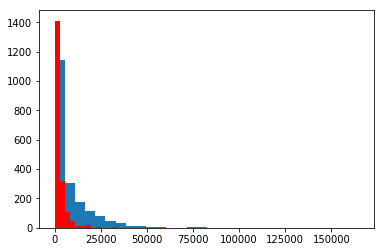

In [198]:
# Looking at the distributions of favorite count and retweet count 

plt.hist(df_master['favorite_count'], bins=30);
plt.hist(df_master['retweet_count'], bins=30, color='red');

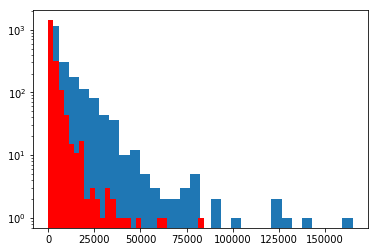

In [199]:
# Favorite count and retweet count distribution with a log transformation

plt.hist(df_master['favorite_count'], bins=30, log=True);
plt.hist(df_master['retweet_count'], bins=30, log=True, color='red');

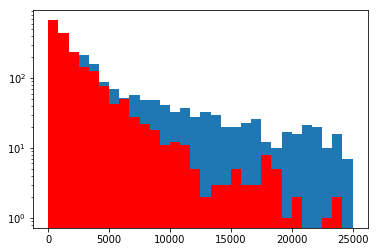

In [200]:
# Limiting the x-axis to get a better view of the data

plt.hist(df_master['favorite_count'], range=(0,25000), bins=30, log=True);
plt.hist(df_master['retweet_count'], range=(0,25000), bins=30, log=True, color='red');

I can see that both the favorite (blue) and retweet (red) distributions are long-tailed, with the bulk of tweets getting less than 25,000 favorites/retweets, but some tweets getting as many as 6 times that.

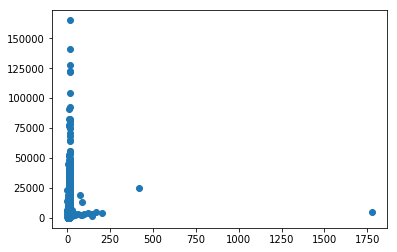

In [201]:
# Looking at numerator rating vs favorite count

plt.scatter(df_master['rating_numerator'], df_master['favorite_count']);

(0, 15)

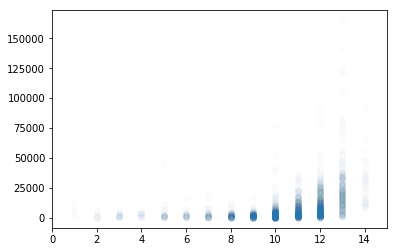

In [202]:
# Limiting the x-axis to get rid of outliers and examine the bulk of the data.

plt.scatter(df_master['rating_numerator'], df_master['favorite_count'], alpha=0.01);
plt.xlim(0,15)

(0, 16)

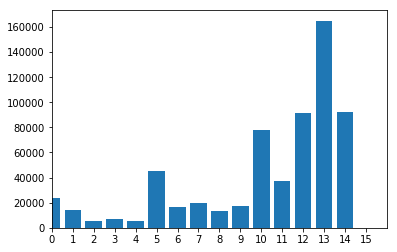

In [203]:
# A scatter plot with numerator rating has vertical lines, so a bar graph might be a better visualization

plt.bar(df_master['rating_numerator'], df_master['favorite_count']);
plt.xticks(range(0,16))
plt.xlim(0,16)

Looking at the numerator rating vs favorite count, the first graph is not very useful due to the inclusion of some extreme outliers. Focusing in on just the numerator ratings between 0 and 15, and using a low alpha value to help against overplotting, there does seem to be an increase in favorite count at higher ratings. And that observation holds true in a bar graph of the same data.

In [208]:
# Correlation matrix of my final DataFrame, while not including the first column and first row which would be tweet id.

df_master.corr().iloc[1:,1:]


,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,favorite_count,retweet_count
rating_numerator,1.000000,0.197442,-0.000713,-0.008874,-0.029759,-0.021719,-0.035158,-0.006196,-0.029876,0.015840,0.018319
rating_denominator,0.197442,1.000000,-0.003026,-0.000629,-0.000575,-0.041019,-0.001842,-0.005183,0.003530,-0.027455,-0.020350
img_num,-0.000713,-0.003026,1.000000,0.206345,0.033262,-0.160844,0.052656,-0.140546,0.066016,0.132966,0.105979
p1_conf,-0.008874,-0.000629,0.206345,1.000000,0.129972,-0.508711,0.146171,-0.709499,0.120809,0.079996,0.055570
p1_dog,-0.029759,-0.000575,0.033262,0.129972,1.000000,0.104989,0.636358,0.043135,0.561054,0.049867,0.009020
p2_conf,-0.021719,-0.041019,-0.160844,-0.508711,0.104989,1.000000,0.093354,0.485397,0.061543,-0.011251,-0.010238
p2_dog,-0.035158,-0.001842,0.052656,0.146171,0.636358,0.093354,1.000000,0.028240,0.556434,0.056576,0.016145
p3_conf,-0.006196,-0.005183,-0.140546,-0.709499,0.043135,0.485397,0.028240,1.000000,0.033620,-0.055148,-0.045590
p3_dog,-0.029876,0.003530,0.066016,0.120809,0.561054,0.061543,0.556434,0.033620,1.000000,0.041991,0.013323
favorite_count,0.015840,-0.027455,0.132966,0.079996,0.049867,-0.011251,0.056576,-0.055148,0.041991,1.000000,0.929643


Looking at the correlation matrix of all the numerical columns except for tweet_id, I see that the confidence of picks are negatively correlated. The correlation coefficient between p1_conf and p2_conf is -0.51, and between p1_conf and p3_conf its -0.71. This makes sense as if the neural network is very confident in one pick, it will have to be much less confident in other picks. 

There's also a positive association between p1_dog, p2_dog, and p3_dog. If one pick is of a dog, its more likely that other picks are also dogs. 

There is a very strong direct relationship between favorite_count and retweet count.

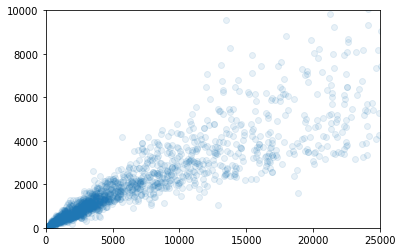

In [210]:
# Looking at favorite_count vs retweet_count, the two variables with the strongest correlation.

plt.scatter(df_master['favorite_count'], df_master['retweet_count'], alpha=0.1);
plt.xlim(0,25000)
plt.ylim(0,10000)
plt.savefig('fav_vs_ret.png')

The strong correlation is very apparent in this graph. I can also see that as the correlation looks even stronger at the bottom left corner compared to the top right. This is probably due to increased variance as the number of favorites and retweets gets higher.